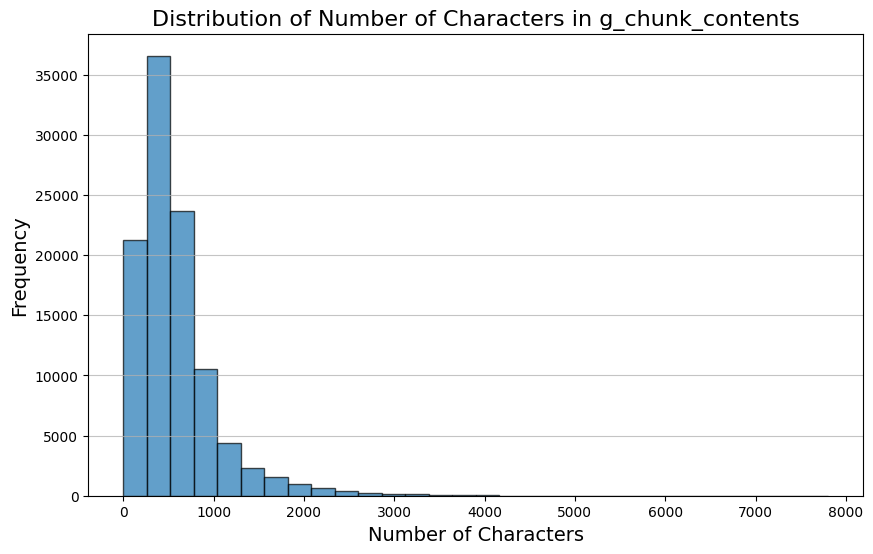

In [1]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the BigQuery client
client = bigquery.Client()

# Query required columns
query = """
SELECT
    a_chunk_id,
    j_file_number,
    e_chunk_type,
    f_chunk_title,
    i_chunk_summary,
    g_chunk_contents,
    r_document_summary,
    LENGTH(g_chunk_contents) AS num_characters,
    t_page_url
FROM `your-project-id.KNOWLEDGE_BASE.CHUNKS`
"""

# Load into DataFrame
df_raw = client.query(query).to_dataframe()

# Display preview
display(df_raw.head())

# Plot distribution of num_characters
plt.figure(figsize=(10, 6))
plt.hist(df_raw['num_characters'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of Number of Characters in g_chunk_contents', fontsize=16)
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


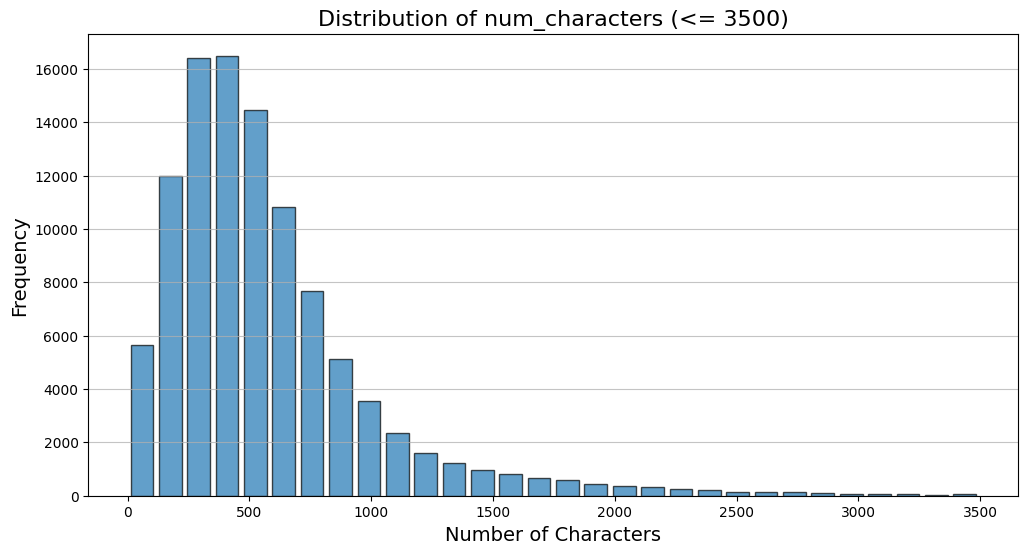

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Filter rows where num_characters <= 3500
filtered_df = df_raw[df_raw['num_characters'] <= 3500]

plt.figure(figsize=(12, 6))
plt.hist(filtered_df['num_characters'], bins=30, alpha=0.7, edgecolor='black', rwidth=0.8)
plt.title('Distribution of num_characters (<= 3500)', fontsize=16)
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(0, 3600, 500))
plt.show()


In [ ]:
import pandas as pd

# Stable working DataFrame: remove duplicated t_page_url values once
df_nodup = df_raw[~df_raw.duplicated(subset=['t_page_url'], keep=False)].copy()

def export_range(dataframe, low=None, high=None, filename='filtered_chunks.csv'):
    if low is None and high is None:
        result = dataframe.copy()
    elif low is None:
        result = dataframe[dataframe['num_characters'] <= high]
    elif high is None:
        result = dataframe[dataframe['num_characters'] >= low]
    else:
        result = dataframe[(dataframe['num_characters'] >= low) & (dataframe['num_characters'] <= high)]

    result.to_csv(filename, index=False)
    print(f'Saved: {filename} | rows: {len(result)}')

    try:
        from google.colab import files
        files.download(filename)
    except Exception:
        # Not running in Colab; file is available in the local working directory
        pass

# Export groups
export_range(df_raw, high=99, filename='filtered_chunks_less_than_100.csv')
export_range(df_nodup, high=99, filename='filtered_chunks_less_than_100_no_duplicates.csv')
export_range(df_nodup, low=100, high=200, filename='filtered_chunks_100_to_200.csv')
export_range(df_nodup, low=200, high=300, filename='filtered_chunks_200_to_300.csv')
export_range(df_nodup, low=300, high=400, filename='filtered_chunks_300_to_400.csv')
export_range(df_nodup, low=400, high=500, filename='filtered_chunks_400_to_500.csv')
export_range(df_nodup, low=500, high=600, filename='filtered_chunks_500_to_600.csv')
export_range(df_nodup, low=600, high=700, filename='filtered_chunks_600_to_700.csv')
export_range(df_nodup, low=2000, high=3000, filename='filtered_chunks_2000_to_3000.csv')
export_range(df_nodup, low=3000, high=6000, filename='filtered_chunks_3000_to_6000.csv')
